In [1]:
# colab에서 같은 폴더에 있는 데이터 csv파일 불러오기

import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving feature.csv to feature.csv


In [3]:
filename = list(uploaded.keys())[0]  # 업로드한 첫 번째 파일의 이름을 가져옵니다.
data = pd.read_csv(filename)

In [4]:
print(data.head())

         date  basis  basis_risk  basis_disparate_ratio  cd_p_change(%)  \
0  2023-07-31   2.94       -0.59                  0.849           0.000   
1  2023-08-01   3.53       -0.59                  1.006           0.000   
2  2023-08-02   3.20       -0.33                  0.931           0.000   
3  2023-08-03   2.34       -0.86                  0.684          -0.267   
4  2023-08-04   2.32       -0.02                  0.679          -0.268   

   cd_p_range  cny_yesterday_change  cny_night_change  jpy_yesterday_change  \
0        0.00                 0.346            -0.824                 0.102   
1        0.00                 0.534            -0.908                 0.743   
2        0.00                 0.304            -0.883                 0.494   
3       -0.01                 0.248            -0.638                 0.860   
4       -0.01                -0.093            -0.176                -0.304   

   jpy_night_change  ...  put_volume_fluc  call_volume_fluc  sp_close_chan

### EDA(데이터 탐색적 분석) - 데이터 특성 파악 및 전처리 계획 수립

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   54 non-null     object 
 1   basis                  54 non-null     float64
 2   basis_risk             54 non-null     float64
 3   basis_disparate_ratio  54 non-null     float64
 4   cd_p_change(%)         54 non-null     float64
 5   cd_p_range             54 non-null     float64
 6   cny_yesterday_change   54 non-null     float64
 7   cny_night_change       54 non-null     float64
 8   jpy_yesterday_change   54 non-null     float64
 9   jpy_night_change       54 non-null     float64
 10  kospi_p_change(%)      54 non-null     float64
 11  kospi_p_range          54 non-null     float64
 12  ks200_p_change(%)      54 non-null     float64
 13  ks200_p_range          54 non-null     float64
 14  NAS_close_change       53 non-null     float64
 15  NAS_day_

In [6]:
data.describe()

,basis,basis_risk,basis_disparate_ratio,cd_p_change(%),cd_p_range,cny_yesterday_change,cny_night_change,jpy_yesterday_change,jpy_night_change,kospi_p_change(%),...,put_volume_fluc,call_volume_fluc,sp_close_change,sp_day_change,sp_day_fluc_range,usd_yesterday_change,usd_night_change,vix_close_change,vix_day_change,vix_day_fluc_range
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,53.000000,53.000000,53.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1.825926,-0.051852,0.545204,0.039463,0.001481,-0.034370,-0.072093,-0.112611,0.119130,-0.030315,...,5.488889,4.437463,-0.114340,-0.089132,43.433774,0.031333,0.060259,1.043704,-0.125130,1.550556
std,0.581889,0.377650,0.164555,0.216852,0.008105,0.388605,0.572749,0.484016,0.654734,0.229605,...,32.125986,28.824936,0.792252,0.771829,16.242665,0.458975,0.030741,6.450144,6.050909,0.764943
min,0.840000,-0.860000,0.252000,-0.541000,-0.020000,-0.881000,-1.156000,-1.082000,-1.427000,-0.604000,...,-76.269000,-77.699000,-1.640000,-1.770000,17.090000,-1.073000,0.002000,-10.920000,-10.328000,0.310000
25%,1.427500,-0.320000,0.435250,0.000000,0.000000,-0.246750,-0.486500,-0.449250,-0.288500,-0.192000,...,-14.560750,-8.387750,-0.620000,-0.715000,30.280000,-0.274000,0.036250,-3.820000,-4.237250,0.982500
50%,1.770000,-0.040000,0.525500,0.000000,0.000000,-0.030000,0.022000,-0.111000,0.179500,-0.024500,...,3.950000,0.673000,-0.160000,-0.026000,41.220000,0.010500,0.059000,-0.320000,-1.385000,1.490000
75%,2.087500,0.230000,0.630750,0.262000,0.010000,0.260000,0.289500,0.143500,0.510750,0.147500,...,23.969250,19.525750,0.430000,0.372000,56.030000,0.313250,0.079750,5.157500,2.646000,1.892500
max,3.530000,0.900000,1.006000,0.536000,0.020000,0.961000,1.221000,0.921000,1.437000,0.378000,...,82.344000,75.194000,1.810000,2.828000,82.750000,0.988000,0.126000,15.850000,16.878000,4.280000


<Axes: >

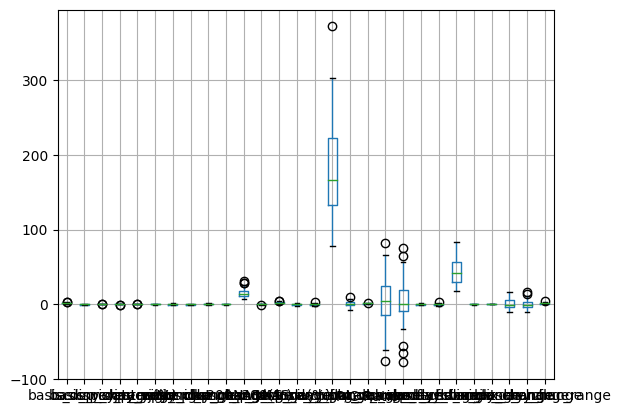

In [7]:
data.boxplot()

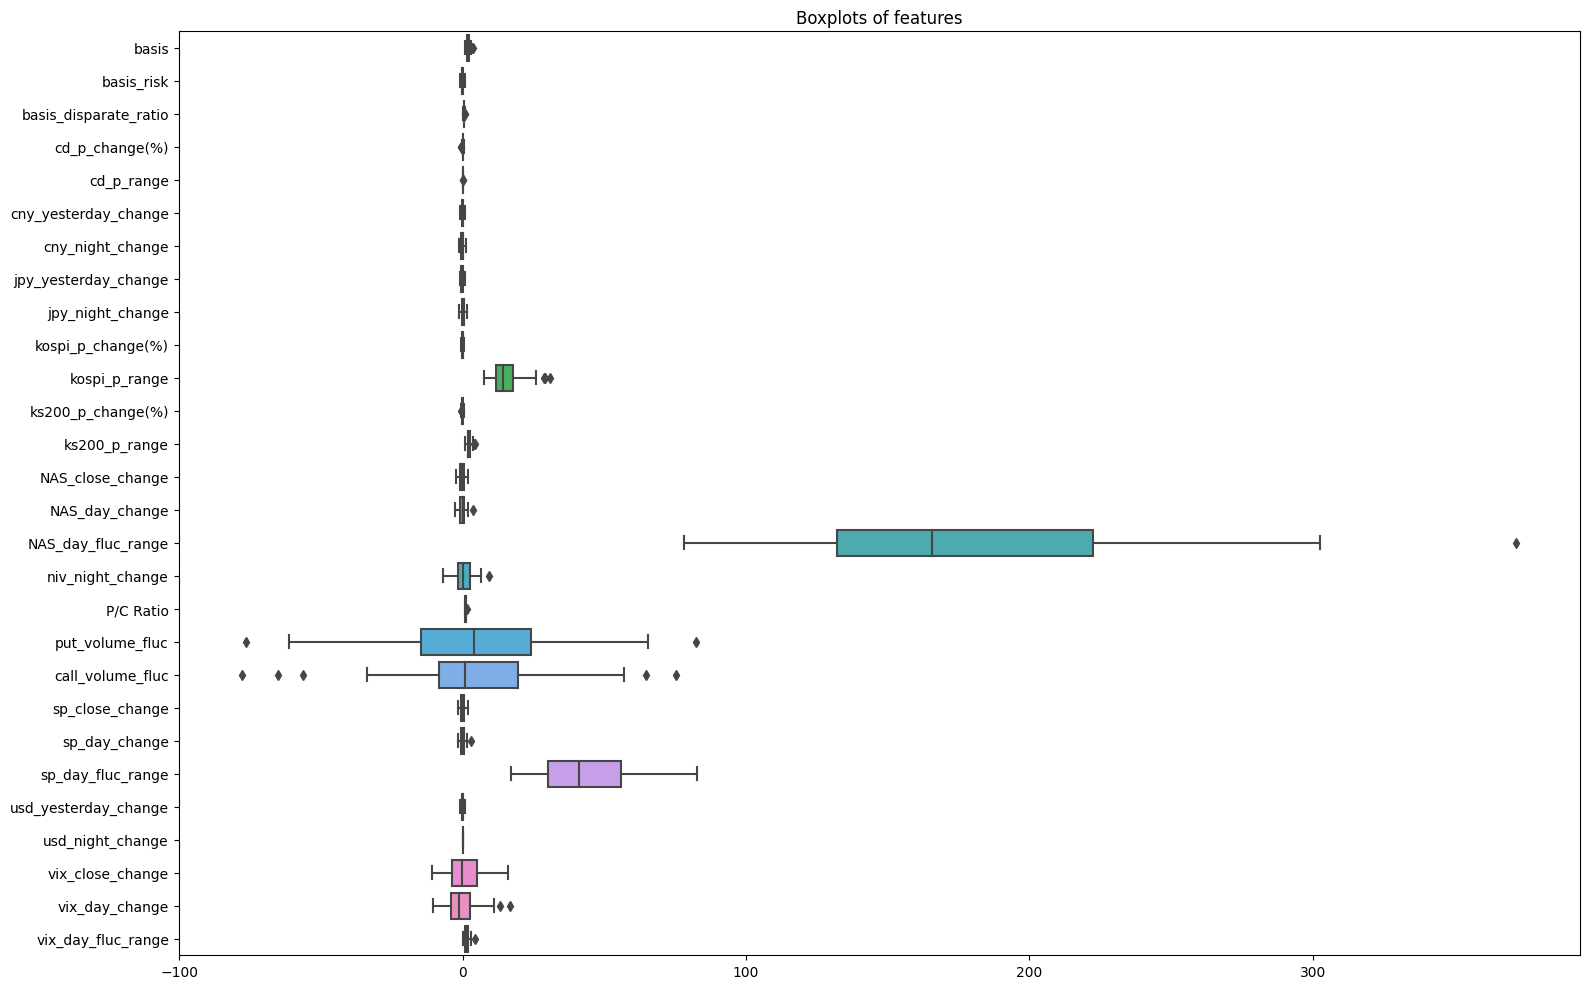

In [26]:
# date 열 제외 boxplot()
# 변수가 많고 변수명도 길어서 가로로 그렸어요
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10)) # 사이즈 조절
sns.boxplot(data=data.drop(columns=['date']), orient='h') # date 제외 boxplot 그리기
plt.title('Boxplots of features') # 그래프 명 지정
plt.tight_layout()
plt.show()
